## **DATA**

In [1]:
import os
import time
import googleapiclient.discovery

def get_comments(vdid):
    # Disable OAuthlib's HTTPS verification when running locally.
    # *DO NOT* leave this option enabled in production.
    os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    DEVELOPER_KEY = '#YouTube API V3'

    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey=DEVELOPER_KEY)

    comments = []
    page_token = ''
    page = 1
    print("=================")
    print("vdid: "+vdid)
    while(True):
        print("page "+str(page)+"...")
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=vdid,
            pageToken=page_token,
            maxResults=100,
            textFormat="plainText",
        )
        response = request.execute()
        comments.extend(response['items'])
        print("result: "+str(response["pageInfo"]["totalResults"]))
        if 'nextPageToken' not in response:
            break;
        time.sleep(2)
        page += 1
        page_token = response['nextPageToken']
    print("*total:", len(comments))
    print("=================")
        
    return comments


if __name__ == "__main__":
    
    links =[
        'https://www.youtube.com/watch?v=E-wtQw32J-8'
    ]
    
    vdids = [link.replace('https://www.youtube.com/watch?v=', '') for link in links]
    vdids = [vdid.replace("&t=", "?t=") for vdid in vdids]  # replace &t= with ?t=
    print(vdids)
        
    comments = []
    for vdid in vdids:
        try:
            comments.append(get_comments(vdid))
        except googleapiclient.errors.HttpError as error:
            print(f"An error occurred: {error}")
            comments.append([])  # append an empty list if an error occurred
            continue

['E-wtQw32J-8']
vdid: E-wtQw32J-8
page 1...
result: 100
page 2...
result: 100
page 3...
result: 100
page 4...
result: 100
page 5...
result: 100
page 6...
result: 100
page 7...
result: 100
page 8...
result: 100
page 9...
result: 100
page 10...
result: 100
page 11...
result: 100
page 12...
result: 100
page 13...
result: 100
page 14...
result: 100
page 15...
result: 100
page 16...
result: 100
page 17...
result: 100
page 18...
result: 100
page 19...
result: 100
page 20...
result: 100
page 21...
result: 100
page 22...
result: 100
page 23...
result: 100
page 24...
result: 100
page 25...
result: 100
page 26...
result: 100
page 27...
result: 100
page 28...
result: 100
page 29...
result: 100
page 30...
result: 100
page 31...
result: 100
page 32...
result: 100
page 33...
result: 100
page 34...
result: 100
page 35...
result: 100
page 36...
result: 100
page 37...
result: 100
page 38...
result: 100
page 39...
result: 100
page 40...
result: 100
page 41...
result: 100
page 42...
result: 100
page 43..

In [2]:
comments_data = []
for comments2 in comments:
    for cm in comments2:
        comments_data.append({
            'id_video':cm['snippet']['videoId'],
            'id_komentar':cm['snippet']['topLevelComment']['id'],
            'text_display':cm['snippet']['topLevelComment']['snippet']['textDisplay'],
            'text_original':cm['snippet']['topLevelComment']['snippet']['textOriginal'],
            'author_name':cm['snippet']['topLevelComment']['snippet']['authorDisplayName'],
            'id_author':cm['snippet']['topLevelComment']['snippet']['authorChannelId']['value'],
            'like_count':cm['snippet']['topLevelComment']['snippet']['likeCount'],
            'published_at':cm['snippet']['topLevelComment']['snippet']['publishedAt'],
            'updated_at':cm['snippet']['topLevelComment']['snippet']['updatedAt']
        })

In [4]:
import pandas as pd

In [5]:
df_comments = pd.DataFrame(comments_data)

In [6]:
df_comments.head()

id_video                 id_komentar  \
0  E-wtQw32J-8  Ugza-NR2wMtc48_IejF4AaABAg   
1  E-wtQw32J-8  UgyN2Lp0-pULs53yQax4AaABAg   
2  E-wtQw32J-8  Ugw632OSQ14DnG8wfrZ4AaABAg   
3  E-wtQw32J-8  Ugy4_LixBYmjxa80DSJ4AaABAg   
4  E-wtQw32J-8  Ugy33yZdPsK16OQB7Wt4AaABAg   

                                        text_display  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                       text_original          author_name  \
0  Jadilah pemimpin yang mengambil keputusan meng...   @TempoVideoChannel   
1  Tenggelam kan TEMPO, semua beritanya berdasark...  @agustizulfakar8406   
2                                           Tempotai         @LbkVlog-o1x   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...     @tazkaadiati4917   
4  Brp milyar anggaran untuj media yg dipangkas. ...      @hendihelmi7006   

                  id_author  like_count          published_at  \
0  UC3QRoNY-nYDTNSv-1dR0P-g        2453  2025-05-17T04:35:28Z   
1  UClMxIDzHzDkU8ADgRqj9jzw           0  2025-05-19T12:52:03Z   
2  UCE7aDDjaYPFXl6wr11mfnqA           0  2025-05-19T12:50:40Z   
3  UCgd0DefC-XU3rlQeUD_ronA           0  2025-05-19T12:48:59Z   
4  UClS6w8Ed3ZBUBdOU3ykH5LA           0  2025-05-19T12:48:42Z   

             updated_at  
0  2025-05-17T04:35:28Z  
1  2025-05-19T12:52:03Z  
2  2025-05-19T12:50:40Z  
3  2025-05-19T12:48:59Z  
4  2025-05-19T12:48:42Z

In [7]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8062 entries, 0 to 8061
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_video       8062 non-null   object
 1   id_komentar    8062 non-null   object
 2   text_display   8062 non-null   object
 3   text_original  8062 non-null   object
 4   author_name    8062 non-null   object
 5   id_author      8062 non-null   object
 6   like_count     8062 non-null   int64 
 7   published_at   8062 non-null   object
 8   updated_at     8062 non-null   object
dtypes: int64(1), object(8)
memory usage: 567.0+ KB


In [9]:
df_comments.to_csv('/kaggle/working/tempo_kdm.csv', index=False)

In [1]:
import pandas as pd

In [2]:
df_comments = pd.read_csv('/kaggle/input/yt-tempo/tempo_kdm.csv')
df_comments.head()

id_video                 id_komentar  \
0  E-wtQw32J-8  Ugza-NR2wMtc48_IejF4AaABAg   
1  E-wtQw32J-8  UgyN2Lp0-pULs53yQax4AaABAg   
2  E-wtQw32J-8  Ugw632OSQ14DnG8wfrZ4AaABAg   
3  E-wtQw32J-8  Ugy4_LixBYmjxa80DSJ4AaABAg   
4  E-wtQw32J-8  Ugy33yZdPsK16OQB7Wt4AaABAg   

                                        text_display  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                       text_original          author_name  \
0  Jadilah pemimpin yang mengambil keputusan meng...   @TempoVideoChannel   
1  Tenggelam kan TEMPO, semua beritanya berdasark...  @agustizulfakar8406   
2                                           Tempotai         @LbkVlog-o1x   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...     @tazkaadiati4917   
4  Brp milyar anggaran untuj media yg dipangkas. ...      @hendihelmi7006   

                  id_author  like_count          published_at  \
0  UC3QRoNY-nYDTNSv-1dR0P-g        2453  2025-05-17T04:35:28Z   
1  UClMxIDzHzDkU8ADgRqj9jzw           0  2025-05-19T12:52:03Z   
2  UCE7aDDjaYPFXl6wr11mfnqA           0  2025-05-19T12:50:40Z   
3  UCgd0DefC-XU3rlQeUD_ronA           0  2025-05-19T12:48:59Z   
4  UClS6w8Ed3ZBUBdOU3ykH5LA           0  2025-05-19T12:48:42Z   

             updated_at  
0  2025-05-17T04:35:28Z  
1  2025-05-19T12:52:03Z  
2  2025-05-19T12:50:40Z  
3  2025-05-19T12:48:59Z  
4  2025-05-19T12:48:42Z

In [3]:
# Jumlah total komentar dan pengguna
total_comments = len(df_comments)
unique_users = df_comments['author_name'].nunique()

print(f"Total Comments: {total_comments}")
print(f"Unique Users: {unique_users}")

Total Comments: 8062
Unique Users: 7409


In [4]:
# Top 5 pengguna dengan komentar terbanyak
top_commenters = (
    df_comments['author_name']
    .value_counts()
    .head(5)
    .reset_index()
    .rename(columns={'index': 'author_name', 'author_name': 'comment_count'})
)

print("\nTop 5 Most Active Commenters:")
print(top_commenters)


Top 5 Most Active Commenters:
     comment_count  count
0     @Neo_VanJava     23
1   @TokoUtomo-r3k     12
2   @antoresta5930     11
3  @QstgbQstgb-t5g     10
4         @Sjingga     10


In [6]:
# Total likes per pengguna
user_likes = (
    df_comments.groupby('author_name')['like_count']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
    .rename(columns={'like_count': 'total_likes'})
)

print("\nTop 5 Users with Most Likes:")
print(user_likes)


Top 5 Users with Most Likes:
           author_name  total_likes
0   @TempoVideoChannel         4908
1     @ngajoragchannel         1409
2  @anisahyulianty3601         1395
3     @SOBATEDIKUSWARA         1287
4    @dororohyakki8001         1143


In [8]:
# Ambil komentar dari top 5 user dengan like terbanyak
top_users = user_likes['author_name'].tolist()
top_comments = df_comments[df_comments['author_name'].isin(top_users)]

# Gabungkan dengan total like
top_comments = top_comments.merge(user_likes, on='author_name')

# Tampilkan hasil per user
for user in top_users:
    print(f"\nUser: {user} | Total Likes: {user_likes[user_likes['author_name'] == user]['total_likes'].values[0]}")
    texts = top_comments[top_comments['author_name'] == user]['text_display'].tolist()
    for i, txt in enumerate(texts[:1], 1):  # tampilkan maksimal 3 komentar per user
        print(f"  {i}. {txt}")


User: @TempoVideoChannel | Total Likes: 4908
  1. Jadilah pemimpin yang mengambil keputusan menggunakan data dan menyelesaikan akar masalah tidak hanya mencari popularitas. ❤

User: @ngajoragchannel | Total Likes: 1409
  1. Saya warga jabar pendukung kdm ... Tapi saya senang kalo kdm ada yang kritik, justru kalo kdm terlalu sering dipuji saya khawatir akan merusak beliau, kita rakyat jabar sangat mencintai beliau karena kita merasakan sendiri danfak dari kebijanakan2 beliau namun kita tidak fanatik alhamdulilah🙏

User: @anisahyulianty3601 | Total Likes: 1395
  1. Setuju dgn kesimpulan tempo. 
Tetap kritis, jauhi fanatisme sempit.
Semoga masyarakat semakin tercerdaskan, dan kita mendapat pemimpin yg cerdas, amanah, rendah hati.

User: @SOBATEDIKUSWARA | Total Likes: 1287
  1. Bagus untuk disimak hingga akhir. Tetap waspada agar tak jatuh ke lubang yang sama, maupun lobang lainnya.

User: @dororohyakki8001 | Total Likes: 1143
  1. Tolonglah yg penggemar KDM, jgn tersungging dl, semua ra

## **PRAPROSES DATA**

In [10]:
!pip install nltk Sastrawi

In [11]:
import re
import nltk
import emoji
import string
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import sent_tokenize, word_tokenize

In [12]:
from datetime import datetime, timedelta

In [13]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
comment_df = pd.read_csv('/kaggle/input/yt-tempo/tempo_kdm.csv',
                        parse_dates=['published_at', 'updated_at'])

In [15]:
comment_df.head()

id_video                 id_komentar  \
0  E-wtQw32J-8  Ugza-NR2wMtc48_IejF4AaABAg   
1  E-wtQw32J-8  UgyN2Lp0-pULs53yQax4AaABAg   
2  E-wtQw32J-8  Ugw632OSQ14DnG8wfrZ4AaABAg   
3  E-wtQw32J-8  Ugy4_LixBYmjxa80DSJ4AaABAg   
4  E-wtQw32J-8  Ugy33yZdPsK16OQB7Wt4AaABAg   

                                        text_display  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                       text_original          author_name  \
0  Jadilah pemimpin yang mengambil keputusan meng...   @TempoVideoChannel   
1  Tenggelam kan TEMPO, semua beritanya berdasark...  @agustizulfakar8406   
2                                           Tempotai         @LbkVlog-o1x   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...     @tazkaadiati4917   
4  Brp milyar anggaran untuj media yg dipangkas. ...      @hendihelmi7006   

                  id_author  like_count              published_at  \
0  UC3QRoNY-nYDTNSv-1dR0P-g        2453 2025-05-17 04:35:28+00:00   
1  UClMxIDzHzDkU8ADgRqj9jzw           0 2025-05-19 12:52:03+00:00   
2  UCE7aDDjaYPFXl6wr11mfnqA           0 2025-05-19 12:50:40+00:00   
3  UCgd0DefC-XU3rlQeUD_ronA           0 2025-05-19 12:48:59+00:00   
4  UClS6w8Ed3ZBUBdOU3ykH5LA           0 2025-05-19 12:48:42+00:00   

                 updated_at  
0 2025-05-17 04:35:28+00:00  
1 2025-05-19 12:52:03+00:00  
2 2025-05-19 12:50:40+00:00  
3 2025-05-19 12:48:59+00:00  
4 2025-05-19 12:48:42+00:00

In [16]:
comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8062 entries, 0 to 8061
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id_video       8062 non-null   object             
 1   id_komentar    8062 non-null   object             
 2   text_display   8060 non-null   object             
 3   text_original  8060 non-null   object             
 4   author_name    8060 non-null   object             
 5   id_author      8062 non-null   object             
 6   like_count     8062 non-null   int64              
 7   published_at   8062 non-null   datetime64[ns, UTC]
 8   updated_at     8062 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(1), object(6)
memory usage: 567.0+ KB


#### Select Column

In [17]:
df = pd.DataFrame()
df['id_komentar']=comment_df['id_komentar']
df['author_name']=comment_df['author_name']
df['updated_at']=comment_df['updated_at']
df['text'] = comment_df['text_display'].astype(str)
df = df.reset_index(drop=True)
df.head()

id_komentar          author_name                updated_at  \
0  Ugza-NR2wMtc48_IejF4AaABAg   @TempoVideoChannel 2025-05-17 04:35:28+00:00   
1  UgyN2Lp0-pULs53yQax4AaABAg  @agustizulfakar8406 2025-05-19 12:52:03+00:00   
2  Ugw632OSQ14DnG8wfrZ4AaABAg         @LbkVlog-o1x 2025-05-19 12:50:40+00:00   
3  Ugy4_LixBYmjxa80DSJ4AaABAg     @tazkaadiati4917 2025-05-19 12:48:59+00:00   
4  Ugy33yZdPsK16OQB7Wt4AaABAg      @hendihelmi7006 2025-05-19 12:48:42+00:00   

                                                text  
0  Jadilah pemimpin yang mengambil keputusan meng...  
1  Tenggelam kan TEMPO, semua beritanya berdasark...  
2                                           Tempotai  
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...  
4  Brp milyar anggaran untuj media yg dipangkas. ...

#### Cleaning

In [18]:
import re

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Non-ASCII
    text = re.sub(r'http\S+|www\S+|pic\.twitter\.com\S+', ' ', text)  # URLs
    text = re.sub(r'\@[\w]+', ' ', text)  # Mentions
    text = re.sub(r'#(\w+)', r'\1', text)  # Hashtags (ambil kata, tanpa "#")
    text = re.sub(r'((?<=[a-z])[A-Z]|[A-Z](?=[a-z]))', r' \1', text)  # Pisah huruf kapital di tengah kata
    text = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', text)  # Remove simbol
    text = re.sub(r'\d+', ' ', text)  # Remove angka
    text = re.sub(r'([a-zA-Z])\1{2,}', r'\1', text)  # Karakter berulang lebih dari 2 → 1
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize spasi

    return text

In [19]:
df['text_cleaning'] = df['text'].apply(preprocess_text)
df.head()

id_komentar          author_name                updated_at  \
0  Ugza-NR2wMtc48_IejF4AaABAg   @TempoVideoChannel 2025-05-17 04:35:28+00:00   
1  UgyN2Lp0-pULs53yQax4AaABAg  @agustizulfakar8406 2025-05-19 12:52:03+00:00   
2  Ugw632OSQ14DnG8wfrZ4AaABAg         @LbkVlog-o1x 2025-05-19 12:50:40+00:00   
3  Ugy4_LixBYmjxa80DSJ4AaABAg     @tazkaadiati4917 2025-05-19 12:48:59+00:00   
4  Ugy33yZdPsK16OQB7Wt4AaABAg      @hendihelmi7006 2025-05-19 12:48:42+00:00   

                                                text  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                       text_cleaning  
0  jadilah pemimpin yang mengambil keputusan meng...  
1  tenggelam kan tempo semua beritanya berdasarka...  
2                                           tempotai  
3  hanya satu pertanyaan saya apakah yang pak kdm...  
4  brp milyar anggaran untuj media yg dipangkas m...

In [21]:
df['text'].iloc[10]

'Coba ada Gubernur yg dermawan kasih anggaran hibah ke media Tempe..ya aman lah...bikin Tempe kan pakai duit....'

In [22]:
df['text_cleaning'].iloc[10]

'coba ada gubernur yg dermawan kasih anggaran hibah ke media tempe ya aman lah bikin tempe kan pakai duit'

In [23]:
df['text'].iloc[100]

'Dengan berkonten, rakyat jadi tau apa yang dikerjakan pemimpin-pemimpinnya terbuka jujur dan tegas seperti KDM. Harusnya dicontoh sama pemimpin pemimpin lain'

In [24]:
df['text_cleaning'].iloc[100]

'dengan berkonten rakyat jadi tau apa yang dikerjakan pemimpin pemimpinnya terbuka jujur dan tegas seperti kdm harusnya dicontoh sama pemimpin pemimpin lain'

In [26]:
df['text'].iloc[1000]

'Sorry bos beda sama jokowi 😅 jokowi blusukan gak sampe pegang sampah bos…. 😂'

In [27]:
df['text_cleaning'].iloc[1000]

'sorry bos beda sama jokowi jokowi blusukan gak sampe pegang sampah bos'

#### Tokenizing

In [28]:
df['tokenizing'] = df['text_cleaning'].apply(word_tokenize)
df.head()

id_komentar          author_name                updated_at  \
0  Ugza-NR2wMtc48_IejF4AaABAg   @TempoVideoChannel 2025-05-17 04:35:28+00:00   
1  UgyN2Lp0-pULs53yQax4AaABAg  @agustizulfakar8406 2025-05-19 12:52:03+00:00   
2  Ugw632OSQ14DnG8wfrZ4AaABAg         @LbkVlog-o1x 2025-05-19 12:50:40+00:00   
3  Ugy4_LixBYmjxa80DSJ4AaABAg     @tazkaadiati4917 2025-05-19 12:48:59+00:00   
4  Ugy33yZdPsK16OQB7Wt4AaABAg      @hendihelmi7006 2025-05-19 12:48:42+00:00   

                                                text  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                       text_cleaning  \
0  jadilah pemimpin yang mengambil keputusan meng...   
1  tenggelam kan tempo semua beritanya berdasarka...   
2                                           tempotai   
3  hanya satu pertanyaan saya apakah yang pak kdm...   
4  brp milyar anggaran untuj media yg dipangkas m...   

                                          tokenizing  
0  [jadilah, pemimpin, yang, mengambil, keputusan...  
1  [tenggelam, kan, tempo, semua, beritanya, berd...  
2                                         [tempotai]  
3  [hanya, satu, pertanyaan, saya, apakah, yang, ...  
4  [brp, milyar, anggaran, untuj, media, yg, dipa...

#### Normalization

In [29]:
kamus = pd.read_csv('/kaggle/input/kamus-alay/colloquial-indonesian-lexicon.csv')
kamus.head()

slang    formal  In-dictionary  \
0     woww       wow              1   
1    aminn      amin              1   
2      met   selamat              1   
3   netaas   menetas              1   
4  keberpa  keberapa              0   

                                             context  category1 category2  \
0                                                wow   elongasi         0   
1  Selamat ulang tahun kakak tulus semoga panjang...   elongasi         0   
2  Met hari netaas kak!? Wish you all the best @t...  abreviasi         0   
3  Met hari netaas kak!? Wish you all the best @t...   afiksasi  elongasi   
4                           Birthday yg keberpa kak?  abreviasi         0   

  category3  
0         0  
1         0  
2         0  
3         0  
4         0

In [30]:
def normalisasi(token):
  for i in range(len(token)):
    if token[i] in kamus['slang'].values:
      idx = kamus.index[kamus['slang'] == token[i]][0]
      token[i] = kamus['formal'][idx]
  return token

In [31]:
df['normalization'] = df['tokenizing'].apply(normalisasi)
df['normalization'].head()

0    [jadilah, pemimpin, yang, mengambil, keputusan...
1    [tenggelam, kan, tempo, semua, beritanya, berd...
2                                           [tempotai]
3    [hanya, satu, pertanyaan, saya, apakah, yang, ...
4    [berapa, milyar, anggaran, untuj, media, yang,...
Name: normalization, dtype: object

#### Stopword

In [32]:
# Membaca file stopwords dari file .txt
with open('/kaggle/input/stopword/stopwords-id.txt', 'r', encoding='utf-8') as file:
    list_stopwords = set(file.read().splitlines())

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [33]:
# Terapkan fungsi stopwords_removal pada kolom 'normalization'
df['stopword'] = df['normalization'].apply(stopwords_removal)

In [34]:
df.head()

id_komentar          author_name                updated_at  \
0  Ugza-NR2wMtc48_IejF4AaABAg   @TempoVideoChannel 2025-05-17 04:35:28+00:00   
1  UgyN2Lp0-pULs53yQax4AaABAg  @agustizulfakar8406 2025-05-19 12:52:03+00:00   
2  Ugw632OSQ14DnG8wfrZ4AaABAg         @LbkVlog-o1x 2025-05-19 12:50:40+00:00   
3  Ugy4_LixBYmjxa80DSJ4AaABAg     @tazkaadiati4917 2025-05-19 12:48:59+00:00   
4  Ugy33yZdPsK16OQB7Wt4AaABAg      @hendihelmi7006 2025-05-19 12:48:42+00:00   

                                                text  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                       text_cleaning  \
0  jadilah pemimpin yang mengambil keputusan meng...   
1  tenggelam kan tempo semua beritanya berdasarka...   
2                                           tempotai   
3  hanya satu pertanyaan saya apakah yang pak kdm...   
4  brp milyar anggaran untuj media yg dipangkas m...   

                                          tokenizing  \
0  [jadilah, pemimpin, yang, mengambil, keputusan...   
1  [tenggelam, kan, tempo, semua, beritanya, berd...   
2                                         [tempotai]   
3  [hanya, satu, pertanyaan, saya, apakah, yang, ...   
4  [berapa, milyar, anggaran, untuj, media, yang,...   

                                       normalization  \
0  [jadilah, pemimpin, yang, mengambil, keputusan...   
1  [tenggelam, kan, tempo, semua, beritanya, berd...   
2                                         [tempotai]   
3  [hanya, satu, pertanyaan, saya, apakah, yang, ...   
4  [berapa, milyar, anggaran, untuj, media, yang,...   

                                            stopword  
0  [pemimpin, mengambil, keputusan, data, menyele...  
1  [tenggelam, tempo, beritanya, berdasarkan, asu...  
2                                         [tempotai]  
3  [kdm, lakukan, kamera, dll, kegiatan, harianny...  
4  [milyar, anggaran, untuj, media, dipangkas, me...

#### Stemming

In [35]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
  return stemmer.stem(term)

In [37]:
#df['stemming'] = df['stopword'].apply(lambda x: [stemmer.stem(y) for y in x if isinstance(y, str)])

In [38]:
# df[['stopword', 'stemming']].head()

#### Comment Clean

In [39]:
df['text_clean'] = df['stopword'].apply(lambda x: ' '.join(map(str, x)))
df.head()

id_komentar          author_name                updated_at  \
0  Ugza-NR2wMtc48_IejF4AaABAg   @TempoVideoChannel 2025-05-17 04:35:28+00:00   
1  UgyN2Lp0-pULs53yQax4AaABAg  @agustizulfakar8406 2025-05-19 12:52:03+00:00   
2  Ugw632OSQ14DnG8wfrZ4AaABAg         @LbkVlog-o1x 2025-05-19 12:50:40+00:00   
3  Ugy4_LixBYmjxa80DSJ4AaABAg     @tazkaadiati4917 2025-05-19 12:48:59+00:00   
4  Ugy33yZdPsK16OQB7Wt4AaABAg      @hendihelmi7006 2025-05-19 12:48:42+00:00   

                                                text  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                       text_cleaning  \
0  jadilah pemimpin yang mengambil keputusan meng...   
1  tenggelam kan tempo semua beritanya berdasarka...   
2                                           tempotai   
3  hanya satu pertanyaan saya apakah yang pak kdm...   
4  brp milyar anggaran untuj media yg dipangkas m...   

                                          tokenizing  \
0  [jadilah, pemimpin, yang, mengambil, keputusan...   
1  [tenggelam, kan, tempo, semua, beritanya, berd...   
2                                         [tempotai]   
3  [hanya, satu, pertanyaan, saya, apakah, yang, ...   
4  [berapa, milyar, anggaran, untuj, media, yang,...   

                                       normalization  \
0  [jadilah, pemimpin, yang, mengambil, keputusan...   
1  [tenggelam, kan, tempo, semua, beritanya, berd...   
2                                         [tempotai]   
3  [hanya, satu, pertanyaan, saya, apakah, yang, ...   
4  [berapa, milyar, anggaran, untuj, media, yang,...   

                                            stopword  \
0  [pemimpin, mengambil, keputusan, data, menyele...   
1  [tenggelam, tempo, beritanya, berdasarkan, asu...   
2                                         [tempotai]   
3  [kdm, lakukan, kamera, dll, kegiatan, harianny...   
4  [milyar, anggaran, untuj, media, dipangkas, me...   

                                          text_clean  
0  pemimpin mengambil keputusan data menyelesaika...  
1  tenggelam tempo beritanya berdasarkan asumsi f...  
2                                           tempotai  
3  kdm lakukan kamera dll kegiatan hariannya kepe...  
4  milyar anggaran untuj media dipangkas media te...

In [42]:
df[['id_komentar', 'author_name', 'updated_at', 'text', 'text_clean']].to_csv('/kaggle/working/yt_kdm_clean.csv', index=False)

# **TEXT ANALYSIS**

#### SENTIMENT ANALYSIS

In [43]:
!pip install torch gensim nltk tqdm googletrans senticnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 MB 33.9 MB/s eta 0:00:00:00:0100:01


In [44]:
!pip install bertopic
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 9.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.3.1
    Uninstalling sentence-transformers-3.3.1:
      Successfully uninstalled sentence-transformers-3.3.1


In [45]:
import pandas as pd
from nltk.tokenize import word_tokenize
import senticnet.senticnet as sn
from googletrans import Translator
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

In [46]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [47]:
df_comment = pd.read_csv('/kaggle/input/data-clean/yt_kdm_clean.csv')
df_comment.head()

id_komentar          author_name                 updated_at  \
0  Ugza-NR2wMtc48_IejF4AaABAg   @TempoVideoChannel  2025-05-17 04:35:28+00:00   
1  UgyN2Lp0-pULs53yQax4AaABAg  @agustizulfakar8406  2025-05-19 12:52:03+00:00   
2  Ugw632OSQ14DnG8wfrZ4AaABAg         @LbkVlog-o1x  2025-05-19 12:50:40+00:00   
3  Ugy4_LixBYmjxa80DSJ4AaABAg     @tazkaadiati4917  2025-05-19 12:48:59+00:00   
4  Ugy33yZdPsK16OQB7Wt4AaABAg      @hendihelmi7006  2025-05-19 12:48:42+00:00   

                                                text  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                          text_clean  
0  pemimpin mengambil keputusan data menyelesaika...  
1  tenggelam tempo beritanya berdasarkan asumsi f...  
2                                           tempotai  
3  kdm lakukan kamera dll kegiatan hariannya kepe...  
4  milyar anggaran untuj media dipangkas media te...

In [48]:
# Hapus baris dengan text_clean kosong atau NaN
df_comment = df_comment[df_comment['text_clean'].notna()]  # hapus NaN
df_comment = df_comment[df_comment['text_clean'].str.strip() != ""]  # hapus string kosong
df_comment.reset_index(drop=True, inplace=True)  # reset index agar rapi

In [49]:
df_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004 entries, 0 to 8003
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_komentar  8004 non-null   object
 1   author_name  8002 non-null   object
 2   updated_at   8004 non-null   object
 3   text         8004 non-null   object
 4   text_clean   8004 non-null   object
dtypes: object(5)
memory usage: 312.8+ KB


In [50]:
df_comment['text_clean'].iloc[200]

'jaman model'

In [51]:
# Batch size
batch_size = 1000

In [56]:
# Load pretrained model and tokenizer (Roberta)
pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


In [67]:
# Label
label_index = {'neutral': 'neutral', 'negative': 'negative', 'positive': 'positive'}

In [68]:
# Inisialisasi kolom sentiment pada dataframe
df_comment['sentiment'] = None

# Proses sentiment analysis dalam batch
for i in tqdm(range(0, len(df_comment), batch_size), desc="Sentiment Analysis"):
    batch = df_comment['text_clean'][i:i + batch_size].tolist()  # Ambil batch komentar
    results = nlp(batch)
    
    # Ekstrak label dari hasil sesuai deteksi
    sentiments = [label_index[result['label']] for result in results]
    df_comment.loc[i:i + batch_size - 1, 'sentiment'] = sentiments

Sentiment Analysis: 100%|██████████| 9/9 [01:08<00:00,  7.59s/it]


In [69]:
df_comment.head()

id_komentar          author_name                 updated_at  \
0  Ugza-NR2wMtc48_IejF4AaABAg   @TempoVideoChannel  2025-05-17 04:35:28+00:00   
1  UgyN2Lp0-pULs53yQax4AaABAg  @agustizulfakar8406  2025-05-19 12:52:03+00:00   
2  Ugw632OSQ14DnG8wfrZ4AaABAg         @LbkVlog-o1x  2025-05-19 12:50:40+00:00   
3  Ugy4_LixBYmjxa80DSJ4AaABAg     @tazkaadiati4917  2025-05-19 12:48:59+00:00   
4  Ugy33yZdPsK16OQB7Wt4AaABAg      @hendihelmi7006  2025-05-19 12:48:42+00:00   

                                                text  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                          text_clean sentiment  
0  pemimpin mengambil keputusan data menyelesaika...   neutral  
1  tenggelam tempo beritanya berdasarkan asumsi f...  negative  
2                                           tempotai  positive  
3  kdm lakukan kamera dll kegiatan hariannya kepe...   neutral  
4  milyar anggaran untuj media dipangkas media te...   neutral

In [70]:
df_comment['sentiment'].value_counts()

sentiment
negative    3124
neutral     2753
positive    2127
Name: count, dtype: int64

#### EMOTION ANALYSIS

In [71]:
# Load pipeline emotion classification dengan model baru
pretrained_name = "StevenLimcorn/indonesian-roberta-base-emotion-classifier"
emotion_pipeline = pipeline(
    "text-classification",  # Gunakan "text-classification" untuk model emotion
    model=pretrained_name,
    tokenizer=pretrained_name,
    top_k=1  # Mengambil emosi dengan skor tertinggi
)

config.json:   0%|          | 0.00/988 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


In [72]:
# Inisialisasi kolom emotion pada dataframe
batch_size = 1000
df_comment['emotion'] = None

# Proses analisis emosi dalam batch
for i in tqdm(range(0, len(df_comment), batch_size), desc="Emotion Analysis"):
    batch = df_comment['text_clean'][i:i + batch_size].tolist()
    emotions = emotion_pipeline(batch)
    
    # Ekstrak label emosi dari hasil prediksi (top_k=1 -> list of list)
    df_comment.loc[i:i + batch_size - 1, 'emotion'] = [e[0]['label'] for e in emotions]

Emotion Analysis: 100%|██████████| 9/9 [01:07<00:00,  7.45s/it]


In [74]:
df_comment.head()

id_komentar          author_name                 updated_at  \
0  Ugza-NR2wMtc48_IejF4AaABAg   @TempoVideoChannel  2025-05-17 04:35:28+00:00   
1  UgyN2Lp0-pULs53yQax4AaABAg  @agustizulfakar8406  2025-05-19 12:52:03+00:00   
2  Ugw632OSQ14DnG8wfrZ4AaABAg         @LbkVlog-o1x  2025-05-19 12:50:40+00:00   
3  Ugy4_LixBYmjxa80DSJ4AaABAg     @tazkaadiati4917  2025-05-19 12:48:59+00:00   
4  Ugy33yZdPsK16OQB7Wt4AaABAg      @hendihelmi7006  2025-05-19 12:48:42+00:00   

                                                text  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                          text_clean sentiment  emotion  
0  pemimpin mengambil keputusan data menyelesaika...   neutral  sadness  
1  tenggelam tempo beritanya berdasarkan asumsi f...  negative  sadness  
2                                           tempotai  positive  sadness  
3  kdm lakukan kamera dll kegiatan hariannya kepe...   neutral    anger  
4  milyar anggaran untuj media dipangkas media te...   neutral  sadness

In [75]:
df_comment['emotion'].value_counts()

emotion
anger      3285
happy      2563
sadness    1781
fear        315
love         60
Name: count, dtype: int64

#### TOPIC MODELLING

In [76]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load IndoBERT embeddings
indo_model = SentenceTransformer('indobenchmark/indobert-base-p1')

# Buat BERTopic model
topic_model = BERTopic(embedding_model=indo_model, language="indonesian")

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [77]:
# Fit model ke data
topics, probs = topic_model.fit_transform(df_comment['text_clean'].tolist())

In [85]:
# Tambahkan hasil ke dataframe
df_comment['topic'] = topics

In [86]:
topic_model.get_topic_info()

Topic  Count                                         Name  \
0      -1   4203                      -1_kdm_tempo_nya_rakyat   
1       0    429                  0_kalo_kayak_pencitraan_sih   
2       1    405            1_masyarakat_beliau_konten_rakyat   
3       2    149                             2_nu_aing_teu_ku   
4       3    138                3_jabar_warga_dukung_gubernur   
..    ...    ...                                          ...   
90     89     10       89_oligarki_ulangi_mulyono_petualangan   
91     90     10  90_ruang_pemerataan_memasukkan_perpolitikan   
92     91     10              91_gugup_kemna_kadeem_nyeritain   
93     92     10    92_menarik_menyajikan_obyekan_menganngkat   
94     93     10                  93_tempe_enak_bosok_tempong   

                                       Representation  \
0   [kdm, tempo, nya, rakyat, jokowi, mulyono, pem...   
1   [kalo, kayak, pencitraan, sih, ya, nya, bagus,...   
2   [masyarakat, beliau, konten, rakyat, orang, kd...   
3   [nu, aing, teu, ku, loba, sia, sunda, mah, bap...   
4   [jabar, warga, dukung, gubernur, barat, jawa, ...   
..                                                ...   
90  [oligarki, ulangi, mulyono, petualangan, porak...   
91  [ruang, pemerataan, memasukkan, perpolitikan, ...   
92  [gugup, kemna, kadeem, nyeritain, season, hubu...   
93  [menarik, menyajikan, obyekan, menganngkat, ke...   
94  [tempe, enak, bosok, tempong, saourch, ameriki...   

                                  Representative_Docs  
0   [provinsi gubernur kritik masif beliau upload ...  
1   [indonesia pencitraan laku pemimpin pencitraan...  
2   [apapun asumsinya media kdm bilang gubernur ko...  
3   [bar mah sa acan kdm mimpin jawa barat urang l...  
4   [dukung kdm orang jabar, rakyat jabar dukung k...  
..                                                ...  
90  [ulangi petualangan mendewakan orang ulangi me...  
91  [konten namanya kesejahteraan pemerataan, ruan...  
92  [kadeem gubernur konten gimmick, nyeritain kdm...  
93  [tempo menarik menyajikan sisi orang, masuk ke...  
94  [kompor kompor meledug sedih tempe penikmat sa...  

[95 rows x 5 columns]

In [88]:
df_comment['topic'].value_counts()

topic
-1     4203
 0      429
 1      405
 2      149
 3      138
       ... 
 89      10
 90      10
 91      10
 92      10
 93      10
Name: count, Length: 95, dtype: int64

In [89]:
# Dapatkan daftar keyword tiap topik dari Representative_Docs
topic_info = topic_model.get_topic_info()

# Mapping topic number ke keyword utama
topic_keywords = {}

for topic_num in topic_info['Topic']:
    # Ambil daftar kata dari Representative_Docs
    if topic_num in topic_info['Topic'].values:
        representative_docs = topic_info.loc[topic_info['Topic'] == topic_num, 'Representative_Docs'].values[0]
        # Gabungkan teks dan split menjadi kata-kata
        keywords = " ".join(representative_docs).split()
        # Ambil top 10 kata yang paling sering muncul
        keyword_list = list(dict.fromkeys(keywords))[:10]  # Mengambil 10 kata unik
        topic_keywords[topic_num] = ", ".join(keyword_list)

# Buat kolom keyword
df_comment['keyword'] = df_comment['topic'].map(topic_keywords)

In [90]:
df_comment.head()

id_komentar          author_name                 updated_at  \
0  Ugza-NR2wMtc48_IejF4AaABAg   @TempoVideoChannel  2025-05-17 04:35:28+00:00   
1  UgyN2Lp0-pULs53yQax4AaABAg  @agustizulfakar8406  2025-05-19 12:52:03+00:00   
2  Ugw632OSQ14DnG8wfrZ4AaABAg         @LbkVlog-o1x  2025-05-19 12:50:40+00:00   
3  Ugy4_LixBYmjxa80DSJ4AaABAg     @tazkaadiati4917  2025-05-19 12:48:59+00:00   
4  Ugy33yZdPsK16OQB7Wt4AaABAg      @hendihelmi7006  2025-05-19 12:48:42+00:00   

                                                text  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                          text_clean sentiment  emotion  \
0  pemimpin mengambil keputusan data menyelesaika...   neutral  sadness   
1  tenggelam tempo beritanya berdasarkan asumsi f...  negative  sadness   
2                                           tempotai  positive  sadness   
3  kdm lakukan kamera dll kegiatan hariannya kepe...   neutral    anger   
4  milyar anggaran untuj media dipangkas media te...   neutral  sadness   

   topic                                            keyword  
0     -1  provinsi, gubernur, kritik, masif, beliau, upl...  
1     -1  provinsi, gubernur, kritik, masif, beliau, upl...  
2     -1  provinsi, gubernur, kritik, masif, beliau, upl...  
3      1  apapun, asumsinya, media, kdm, bilang, gubernu...  
4     68  efek, anggaran, media, efisiensi, tau, ditekan...

In [97]:
df_comment['keyword'].value_counts()

keyword
provinsi, gubernur, kritik, masif, beliau, upload, kebijakan, tindak, tandu, nya                      4203
indonesia, pencitraan, laku, pemimpin, ya, layak, enggak, apa-apa, pro, rakyat                         429
apapun, asumsinya, media, kdm, bilang, gubernur, konten, populis, apalah, hasilnya                     405
bar, mah, sa, acan, kdm, mimpin, jawa, barat, urang, loba                                              149
dukung, kdm, orang, jabar, rakyat                                                                      138
                                                                                                      ... 
ulangi, petualangan, mendewakan, orang, memilih, gorong, mukiyo, rakyat, kritis, netul                  10
konten, namanya, kesejahteraan, pemerataan, ruang, skeptis, pejabat, publik, pengalaman, apresiasi      10
kadeem, gubernur, konten, gimmick, nyeritain, kdm, gugup, video, peluang, pilpres                       10
tempo, menarik, menyajikan, s

In [95]:
# Ambil setiap topik unik dan deskripsi keyword-nya
unique_topics = df_comment[['topic', 'keyword']].drop_duplicates(subset=['topic'])

# Simpan ke file txt
unique_topics.to_csv('/kaggle/working/topic_description.txt', index=False, header=False, sep='|')

In [94]:
df_comment.to_csv('/kaggle/working/result_analysis.csv', index=False)

#### VISUALIZATION

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/result-data/result_analysis (1).csv")
df.head()

id_komentar          author_name                 updated_at  \
0  Ugza-NR2wMtc48_IejF4AaABAg   @TempoVideoChannel  2025-05-17 04:35:28+00:00   
1  UgyN2Lp0-pULs53yQax4AaABAg  @agustizulfakar8406  2025-05-19 12:52:03+00:00   
2  Ugw632OSQ14DnG8wfrZ4AaABAg         @LbkVlog-o1x  2025-05-19 12:50:40+00:00   
3  Ugy4_LixBYmjxa80DSJ4AaABAg     @tazkaadiati4917  2025-05-19 12:48:59+00:00   
4  Ugy33yZdPsK16OQB7Wt4AaABAg      @hendihelmi7006  2025-05-19 12:48:42+00:00   

                                                text  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                          text_clean sentiment  emotion  \
0  pemimpin mengambil keputusan data menyelesaika...   neutral  sadness   
1  tenggelam tempo beritanya berdasarkan asumsi f...  negative  sadness   
2                                           tempotai  positive  sadness   
3  kdm lakukan kamera dll kegiatan hariannya kepe...   neutral    anger   
4  milyar anggaran untuj media dipangkas media te...   neutral  sadness   

   topic                                            keyword  
0     -1  provinsi, gubernur, kritik, masif, beliau, upl...  
1     -1  provinsi, gubernur, kritik, masif, beliau, upl...  
2     -1  provinsi, gubernur, kritik, masif, beliau, upl...  
3      1  apapun, asumsinya, media, kdm, bilang, gubernu...  
4     68  efek, anggaran, media, efisiensi, tau, ditekan...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004 entries, 0 to 8003
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_komentar  8004 non-null   object
 1   author_name  8002 non-null   object
 2   updated_at   8004 non-null   object
 3   text         8004 non-null   object
 4   text_clean   8004 non-null   object
 5   sentiment    8004 non-null   object
 6   emotion      8004 non-null   object
 7   topic        8004 non-null   int64 
 8   keyword      8004 non-null   object
dtypes: int64(1), object(8)
memory usage: 562.9+ KB


In [4]:
def deteksi_target(text):
    text = text.lower()
    # Kata kunci untuk Tempo
    tempo_keywords = ['tempo', 'bocor', 'alus', 'majalah']

    if any(kw in text for kw in tempo_keywords):
        return 'Tempo'
    else:
        return 'KDM'

# Terapkan ke dataframe
df['target_opini'] = df['text_clean'].apply(deteksi_target)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [6]:
df['sentiment'].value_counts()

sentiment
negative    3124
neutral     2753
positive    2127
Name: count, dtype: int64

In [7]:
df['target_opini'].value_counts()

target_opini
KDM      6409
Tempo    1595
Name: count, dtype: int64

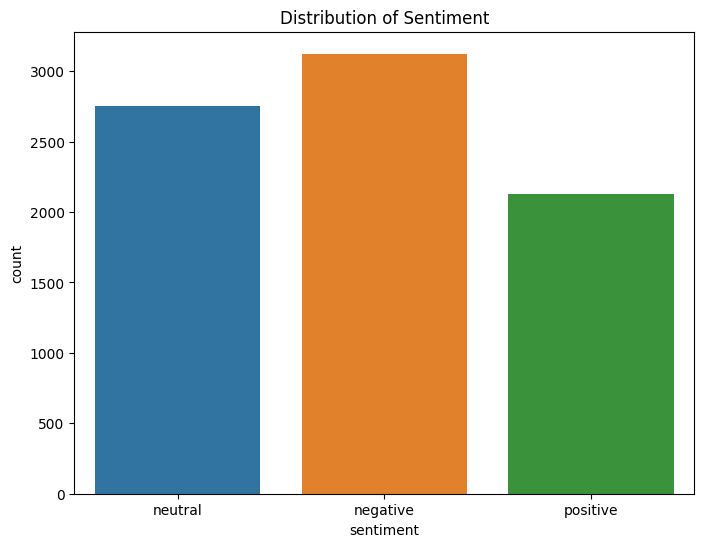

In [8]:
# EDA Sentiment
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment')
plt.title('Distribution of Sentiment')
plt.show()

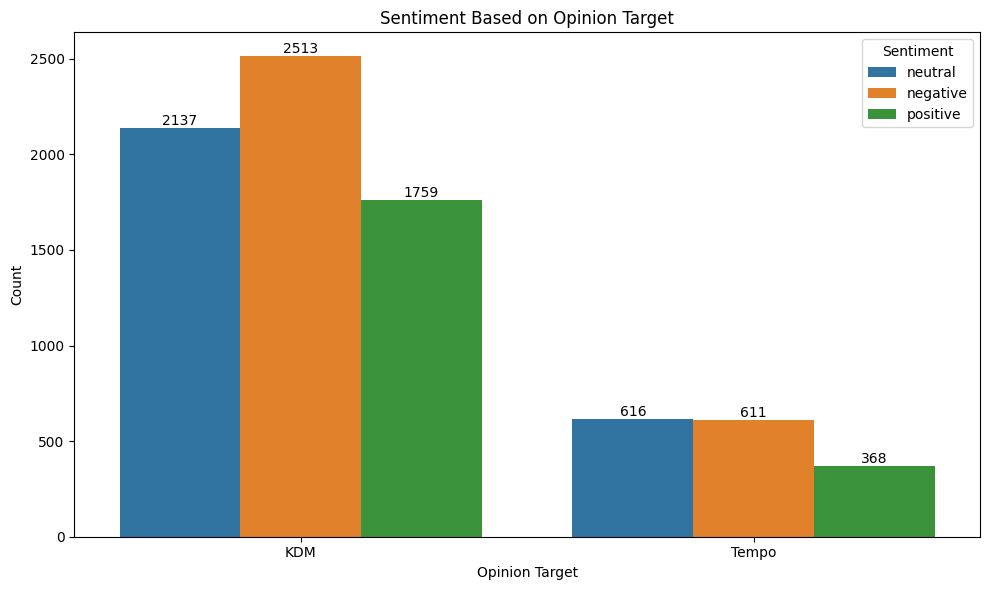

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='target_opini', hue='sentiment')

# Tambahkan label di setiap bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Sentiment Based on Opinion Target')
plt.xlabel('Opinion Target')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [10]:
df['emotion'].value_counts()

emotion
anger      3285
happy      2563
sadness    1781
fear        315
love         60
Name: count, dtype: int64

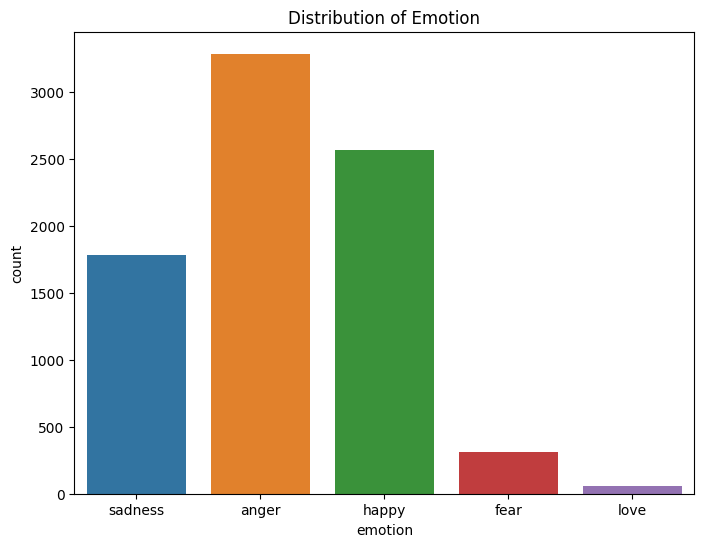

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='emotion')
plt.title('Distribution of Emotion')
plt.show()

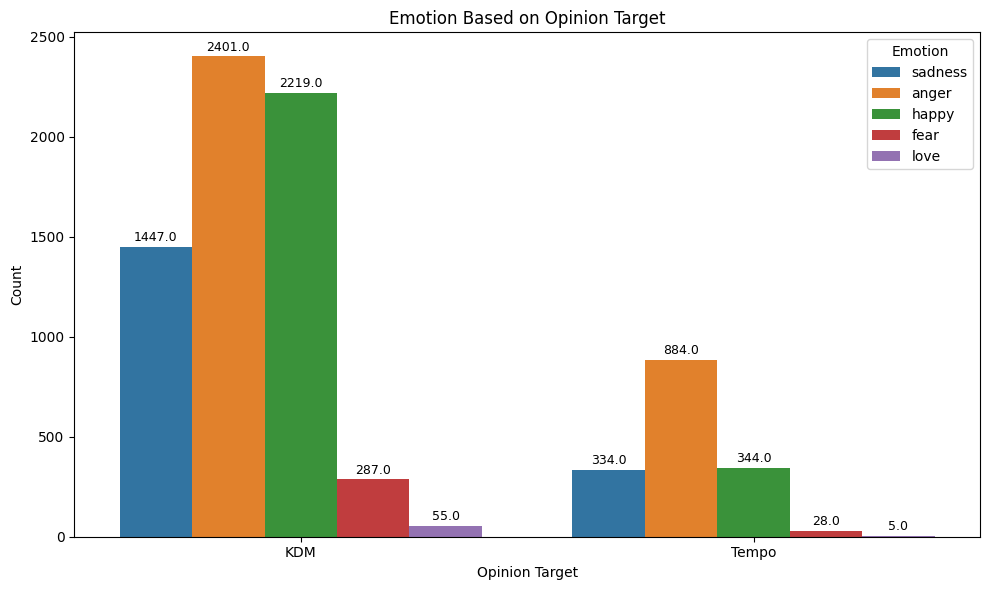

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='target_opini', hue='emotion')
plt.title('Emotion Based on Opinion Target')
plt.xlabel('Opinion Target')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.tight_layout()

# Menambahkan label jumlah di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=9, color='black', 
                xytext=(0, 2),
                textcoords='offset points')

plt.show()

In [20]:
for opinion in df['target_opini'].unique():
    print(f"\n=== Target Opini: {opinion.upper()} ===")
    for sent in df['sentiment'].unique():
        print(f"\nSentiment: {sent}")
        subset = df[(df['sentiment'] == sent) & (df['target_opini'] == opinion)]
        if not subset.empty:
            samples = subset[['author_name', 'text']].sample(n=min(2, len(subset)), random_state=10)
            for _, row in samples.iterrows():
                print(f"- {row['author_name']}: {row['text']}")
        else:
            print("Tidak ada komentar.")


=== Target Opini: KDM ===

Sentiment: neutral
- @gatotsumali8343: Lanjut kdm yang hot dan inspieatif biar terang benerang
- @YokiAtmaja-c9r: Bapa aing jangan di samakan dengan MULYONO. Sori ye

Sentiment: negative
- @RosIdin-pw8tj: Hati hati dengan narasi narasi yg di bangaun oleh media yg di danai asing ....waspada
- @josamchanel2604: Awas jokowi jilid 2

Sentiment: positive
- @lm3490: Masalah orang kt kl sudah cinta, itu bnr2 buta. Ga bs terima kritik dr pihak luar. Kt hrs openmind. Saya suka gaya KDM. Tp ada bnernya. Masalah jawabarat itu buatnya. Dan hrs cari skala prioritas mana yg urgent. Bukan hanya viral. Jgn dulu jd presiden. Jawa barat butuh KDM 2 periode biar jabar makin ok
- @yettyyuliawati5624: Jangan samakan KDM dngn JKW.... Jauh!!!!! Seperti langit dan bumi...

=== Target Opini: TEMPO ===

Sentiment: neutral
- @SadulurNgopi: Kayaknya Tempo yang dibilang media berita malah kalah berita sama penyimak beritanya😂😂😂
Rencana jangka panjang KDM mengatasi problematika di jawa b

In [19]:
for opinion in df['target_opini'].unique():
    print(f"\n=== Target Opini: {opinion.upper()} ===")
    for emo in df['emotion'].unique():
        print(f"\nEmotion: {emo}")
        subset = df[(df['emotion'] == emo) & (df['target_opini'] == opinion)]
        if not subset.empty:
            samples = subset[['author_name', 'text']].sample(min(2, len(subset)), random_state=20)
            for _, row in samples.iterrows():
                print(f"- {row['author_name']}: {row['text']}")
        else:
            print("Tidak ada komentar.")


=== Target Opini: KDM ===

Emotion: sadness
- @NaniSumarni-z9z: Jauh beda donkkk
- @superbedjo2243: Kebetulan domisili sy jabar sejauh ini masih percaya KDM penilaiannya 3 tahun pertama menjabat & sisanya nilai akhir setelah itu baru kelayakan entah itu jabar 2 periode atau RI 1

Emotion: anger
- @fsldlh2383: Jgn sampe kita tertipu 2x...SDH cukup Mulyono yg menipu kita. Dulu waktu awal Mulyono kampanye 2014 di daerah Jateng khususnya di Boyolali jg menggambarkan Mulyono SBG raja. Bahkan sampe angkot² ada gambar Mulyono memakai pakaian raja. Tapi Krn di protes, kmd dihapus dn di cat.

Hati org TDK ada yg tau, apa yg lagi di agendakan dn diusahakan scr masif oleh KDM. Saat ini lgi sibuk cari simpati. KLO mmg bekerja dg hati, tidak perlu kemana² bawa camera... Cukup silent Yapi hasilnya maksimal. Sprti contohnya pak Anies, ga pernah berkoar² tapi semua bisa selesai dg baik. KLO kemana² bawa camera, psti ada agenda tersembunyi. Saat ini yg dilihatkan yg baik² semua...apalgi kdm cenderung 

In [21]:
stopwords = set(['yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 
                            'pada', 'dalam', 'adalah', 'atau', 'itu', 'ini', 
                            'saya', 'kamu', 'mereka', 'kami', 'tidak', 'bukan', 
                            'akan', 'sudah', 'belum', 'lebih', 'kurang', 'kalo', 
                            'nya', 'ya'])

In [22]:
# Wordcloud
def create_wordcloud(text, mask=None):
    stopwords = set(STOPWORDS)
    wc = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, mask=mask).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


=== Wordcloud for Target Opini: KDM ===

Wordcloud for Sentiment: neutral


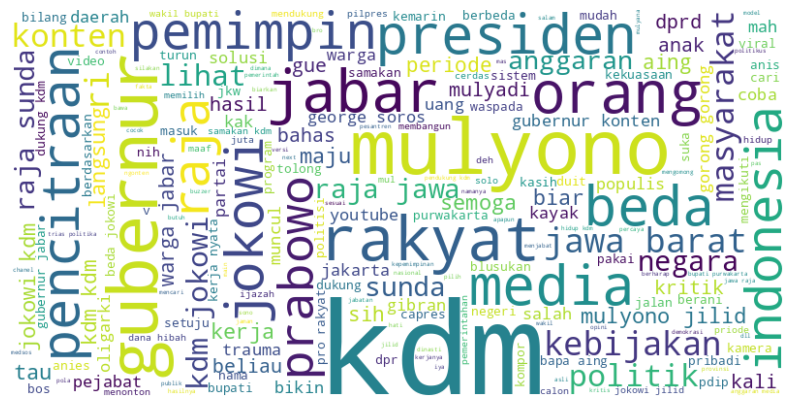


Wordcloud for Sentiment: negative


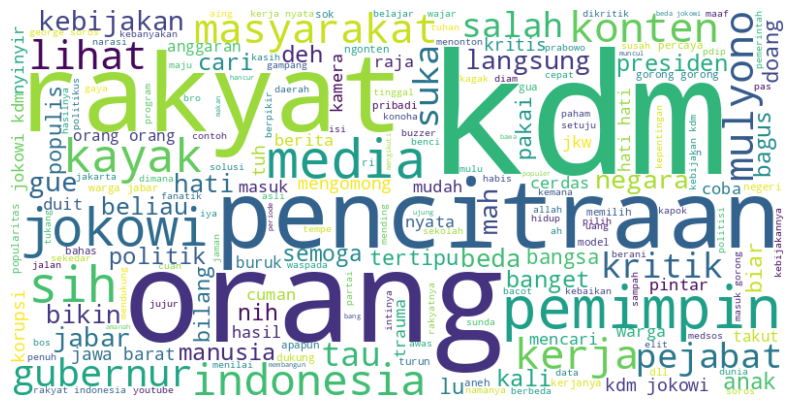


Wordcloud for Sentiment: positive


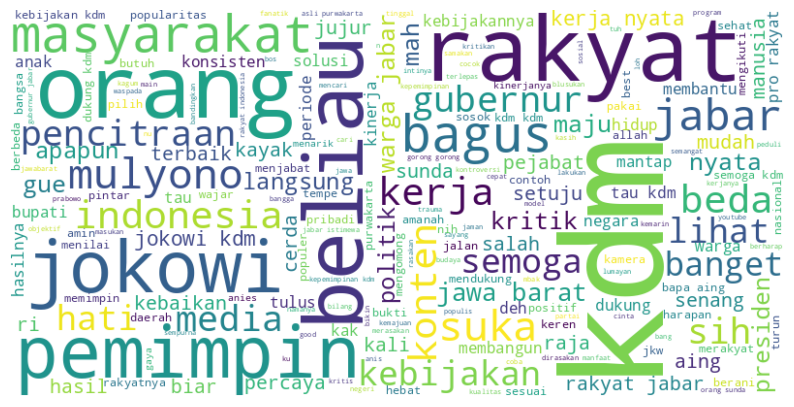


=== Wordcloud for Target Opini: TEMPO ===

Wordcloud for Sentiment: neutral


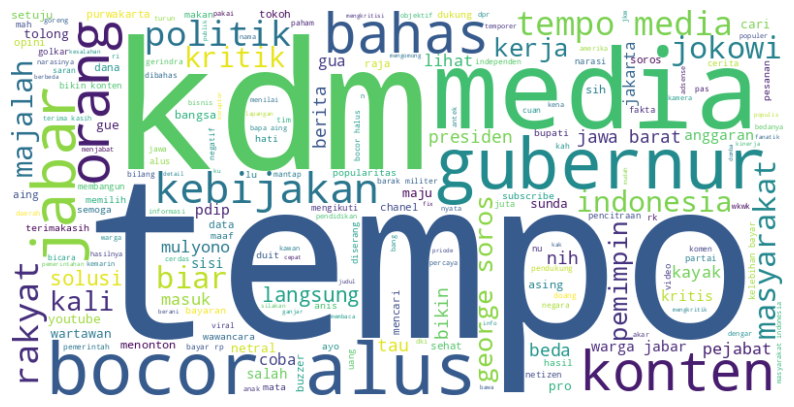


Wordcloud for Sentiment: negative


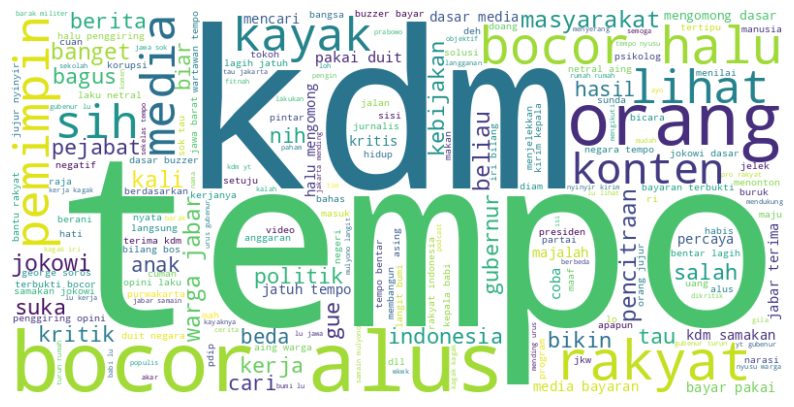


Wordcloud for Sentiment: positive


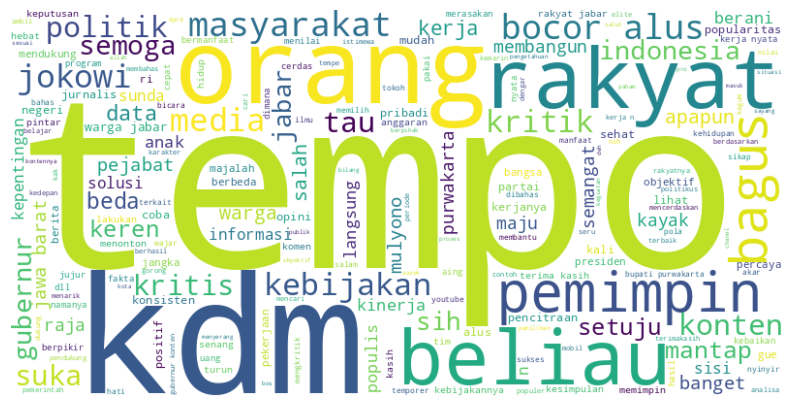

In [25]:
for opinion in df['target_opini'].unique():
    print(f"\n=== Wordcloud for Target Opini: {opinion.upper()} ===")
    for sent in df['sentiment'].unique():
        subset = df[(df['target_opini'] == opinion) & (df['sentiment'] == sent)]
        if not subset.empty:
            text_sent = ' '.join(subset['text_clean'])
            text_sent = ' '.join([word for word in text_sent.split() if word.lower() not in stopwords])
            print(f"\nWordcloud for Sentiment: {sent}")
            create_wordcloud(text_sent, mask=None)
        else:
            print(f"Tidak ada data untuk sentiment '{sent}' pada opini '{opinion}'.")


Wordcloud for Emotion: sadness


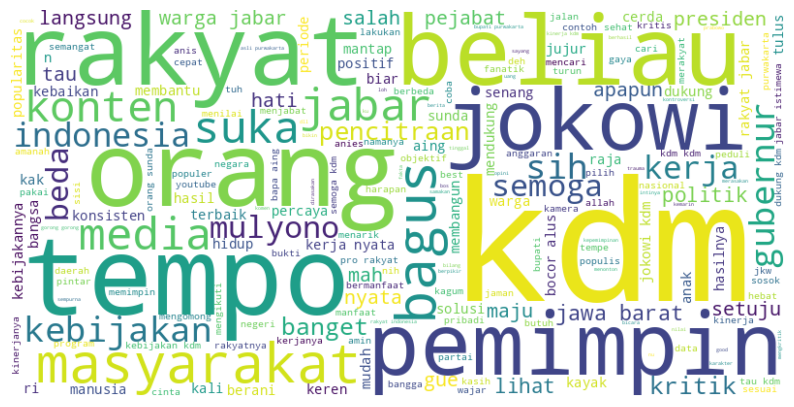


Wordcloud for Emotion: anger


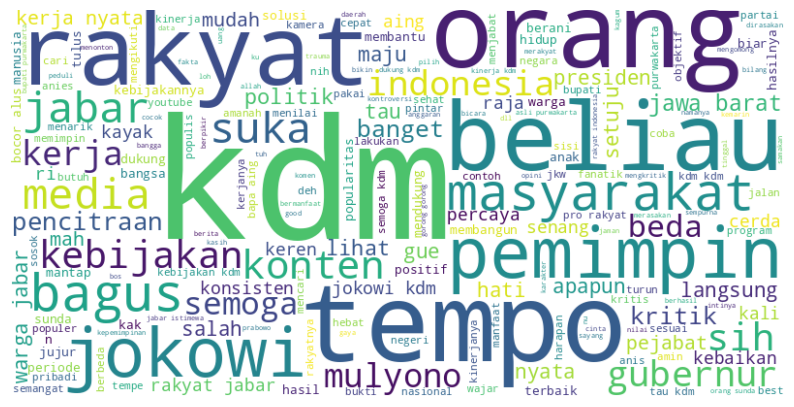


Wordcloud for Emotion: happy


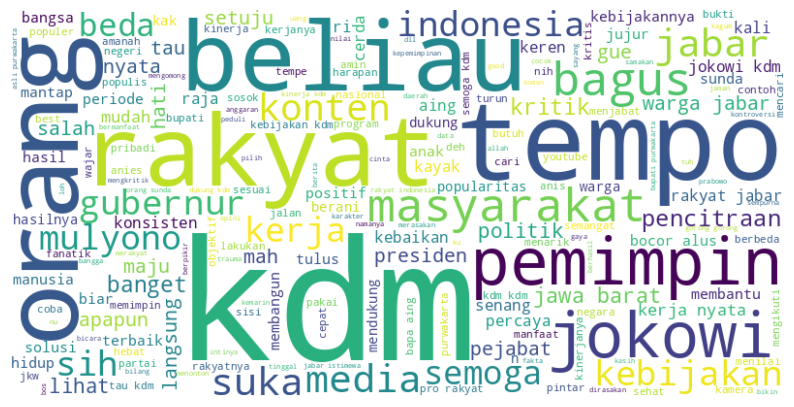


Wordcloud for Emotion: fear


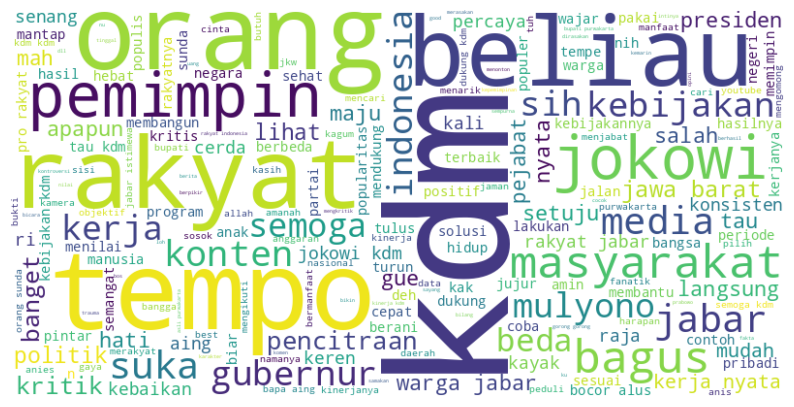


Wordcloud for Emotion: love


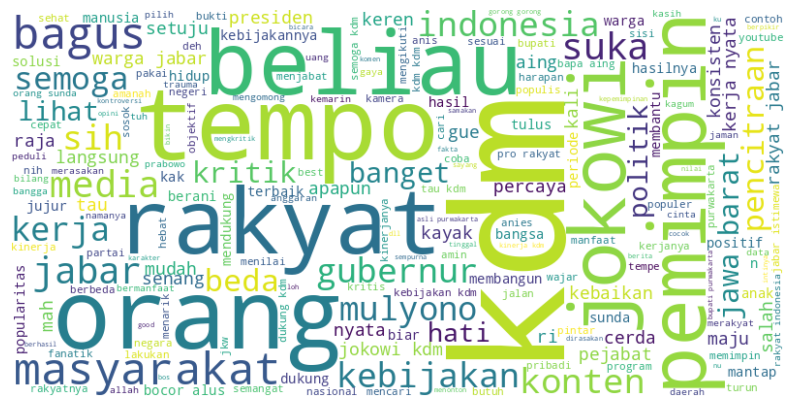

In [24]:
for emo in df['emotion'].unique():
    text_emo = ' '.join(df[df['emotion'] == sent]['text_clean'])
    text_emo = ' '.join([word for word in text_sent.split() if word.lower() not in stopwords])
    print(f"\nWordcloud for Emotion: {emo}")
    create_wordcloud(text_emo, mask=None)

In [26]:
# Sentiment and Emotion Over Time
df['date'] = pd.to_datetime(df['updated_at']).dt.date
df['hour'] = pd.to_datetime(df['updated_at']).dt.hour

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


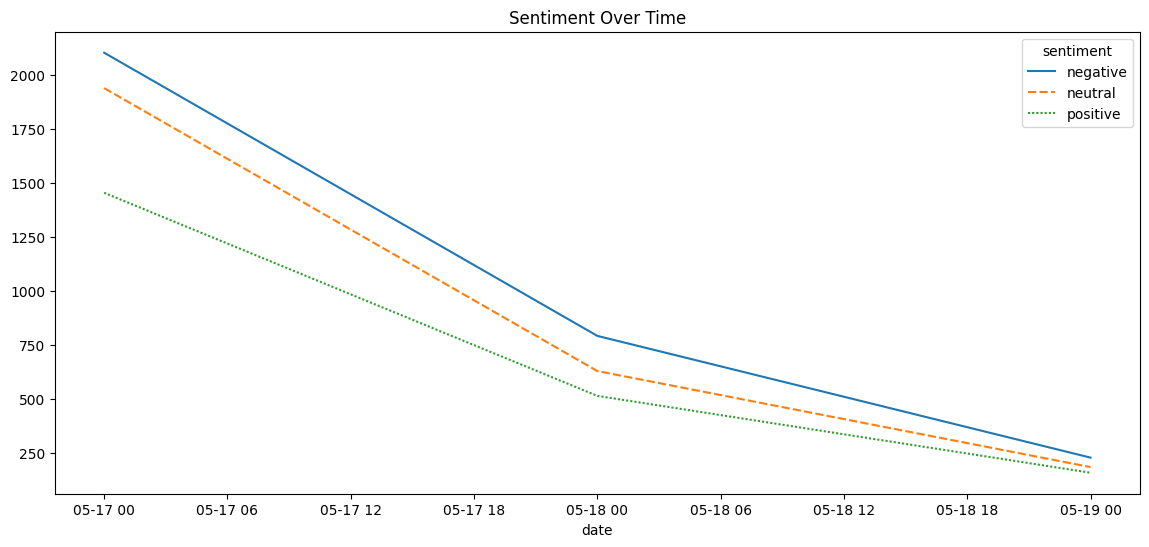

In [27]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df.groupby('date')['sentiment'].value_counts().unstack().fillna(0))
plt.title('Sentiment Over Time')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


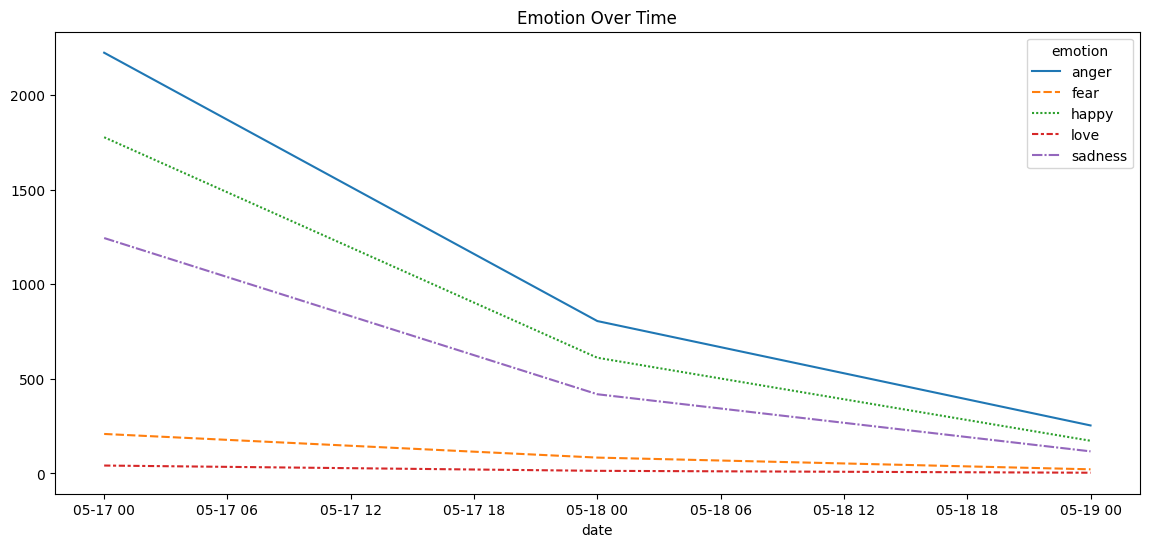

In [28]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df.groupby('date')['emotion'].value_counts().unstack().fillna(0))
plt.title('Emotion Over Time')
plt.show()

In [29]:
df_new = df.copy()
df_new.head()

id_komentar          author_name                 updated_at  \
0  Ugza-NR2wMtc48_IejF4AaABAg   @TempoVideoChannel  2025-05-17 04:35:28+00:00   
1  UgyN2Lp0-pULs53yQax4AaABAg  @agustizulfakar8406  2025-05-19 12:52:03+00:00   
2  Ugw632OSQ14DnG8wfrZ4AaABAg         @LbkVlog-o1x  2025-05-19 12:50:40+00:00   
3  Ugy4_LixBYmjxa80DSJ4AaABAg     @tazkaadiati4917  2025-05-19 12:48:59+00:00   
4  Ugy33yZdPsK16OQB7Wt4AaABAg      @hendihelmi7006  2025-05-19 12:48:42+00:00   

                                                text  \
0  Jadilah pemimpin yang mengambil keputusan meng...   
1  Tenggelam kan TEMPO, semua beritanya berdasark...   
2                                           Tempotai   
3  Hanya satu pertanyaan saya, "Apakah yang Pak K...   
4  Brp milyar anggaran untuj media yg dipangkas. ...   

                                          text_clean sentiment  emotion  \
0  pemimpin mengambil keputusan data menyelesaika...   neutral  sadness   
1  tenggelam tempo beritanya berdasarkan asumsi f...  negative  sadness   
2                                           tempotai  positive  sadness   
3  kdm lakukan kamera dll kegiatan hariannya kepe...   neutral    anger   
4  milyar anggaran untuj media dipangkas media te...   neutral  sadness   

   topic                                            keyword target_opini  \
0     -1  provinsi, gubernur, kritik, masif, beliau, upl...          KDM   
1     -1  provinsi, gubernur, kritik, masif, beliau, upl...        Tempo   
2     -1  provinsi, gubernur, kritik, masif, beliau, upl...        Tempo   
3      1  apapun, asumsinya, media, kdm, bilang, gubernu...          KDM   
4     68  efek, anggaran, media, efisiensi, tau, ditekan...        Tempo   

         date  hour  
0  2025-05-17     4  
1  2025-05-19    12  
2  2025-05-19    12  
3  2025-05-19    12  
4  2025-05-19    12

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004 entries, 0 to 8003
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_komentar   8004 non-null   object
 1   author_name   8002 non-null   object
 2   updated_at    8004 non-null   object
 3   text          8004 non-null   object
 4   text_clean    8004 non-null   object
 5   sentiment     8004 non-null   object
 6   emotion       8004 non-null   object
 7   topic         8004 non-null   int64 
 8   keyword       8004 non-null   object
 9   target_opini  8004 non-null   object
 10  date          8004 non-null   object
 11  hour          8004 non-null   int32 
dtypes: int32(1), int64(1), object(10)
memory usage: 719.2+ KB


In [31]:
# Keyword Analysis per Topic
for topic in df_new['topic'].unique():
    print(f"\nTopic {topic}")
    print(df_new[df_new['topic'] == topic]['keyword'].sample(1, random_state=42).to_list())


Topic -1
['provinsi, gubernur, kritik, masif, beliau, upload, kebijakan, tindak, tandu, nya']

Topic 1
['apapun, asumsinya, media, kdm, bilang, gubernur, konten, populis, apalah, hasilnya']

Topic 68
['efek, anggaran, media, efisiensi, tau, ditekan, nya, belanja, pemprov, jabar']

Topic 2
['bar, mah, sa, acan, kdm, mimpin, jawa, barat, urang, loba']

Topic 5
['sok, tau, ah, gub, banget, sih']

Topic 47
['hati, waspada, kejadian, terulang, pemimpin, tertipu']

Topic 6
['gas, kdm, ri, oh, fan, go, r']

Topic 56
['semenjak, kdm, gubernur, uang, bpmu, cair, seminggu, habis, idil, fitri']

Topic 27
['banget, buzzer, soros, bocor, alus, politik, nih, kayak, ya']

Topic 37
['beda, jokowi, kdm, orang, sunda, jawa, kayak, sumatra, terbuka, aling']

Topic 14
['bahaya, cegat, ayo, pendukung, abah, cari, celah, kesalahan, kdm, terlambat']

Topic 42
['barisan, orang, sakit, hati']

Topic 8
['raja, jawa, muncul, sunda, partai']

Topic 15
['lihat, kritis, sih, nyinyir, kerja, nya, nyata, cuman, doan

In [33]:
df_new['keyword'].value_counts()

keyword
provinsi, gubernur, kritik, masif, beliau, upload, kebijakan, tindak, tandu, nya                      4203
indonesia, pencitraan, laku, pemimpin, ya, layak, enggak, apa-apa, pro, rakyat                         429
apapun, asumsinya, media, kdm, bilang, gubernur, konten, populis, apalah, hasilnya                     405
bar, mah, sa, acan, kdm, mimpin, jawa, barat, urang, loba                                              149
dukung, kdm, orang, jabar, rakyat                                                                      138
                                                                                                      ... 
ulangi, petualangan, mendewakan, orang, memilih, gorong, mukiyo, rakyat, kritis, netul                  10
konten, namanya, kesejahteraan, pemerataan, ruang, skeptis, pejabat, publik, pengalaman, apresiasi      10
kadeem, gubernur, konten, gimmick, nyeritain, kdm, gugup, video, peluang, pilpres                       10
tempo, menarik, menyajikan, s